<a href="https://colab.research.google.com/github/sleepless-se/30nichideosjisaku/blob/master/open_cv_remove_background.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


def get_gradation_2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T
def get_gradation_3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)), dtype=np.float)

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = get_gradation_2d(start, stop, width, height, is_horizontal)
    return result
  

def nparray_to_rgb(nparry:np.array):
  return (int(nparry[0]),int(nparry[1]),int(nparry[2]))
  
def find_edge(img_path:str):
  img = cv2.imread(img_path,0)
  blur = cv2.blur(img,(5,5))
  edges = cv2.Canny(blur,100,200)
  return edges

def find_target(edges): 
  results = np.where(edges==255)
  top = np.min(results[0])
  bottom = np.max(results[0]) - 1
  left = np.min(results[1])
  right = np.max(results[1]) - 1
  return (left,top,right,bottom)

def to_RGB(image:Image):
  if image.mode == 'RGB': return image
  background = Image.new("RGB", image.size, (255, 255, 255))
  background.paste(image, mask=image.split()[3])  # 3 is the alpha channel
  background.format = image.format
  return background

def get_median_color(img:Image,px):
  array = np.array(img)
  median = np.median(array,axis=1)
  return median[px]
def get_around(img_path):
  edges = find_edge(img_path)
  left,top,right,bottom = find_target(edges)
  return (left,top,right,bottom)
def average_np(array:list):
  array = np.array(array)
  array = np.average(array,axis=0)
  return (int(array[0]),int(array[1]),int(array[2]))



top_color [array([207., 208., 211.]), array([255., 255., 255.])]
bottom_color [array([207., 203., 196.]), array([255., 255., 255.])]
bg_top_color (231, 231, 233)
bg_bottom_color (231, 229, 225)


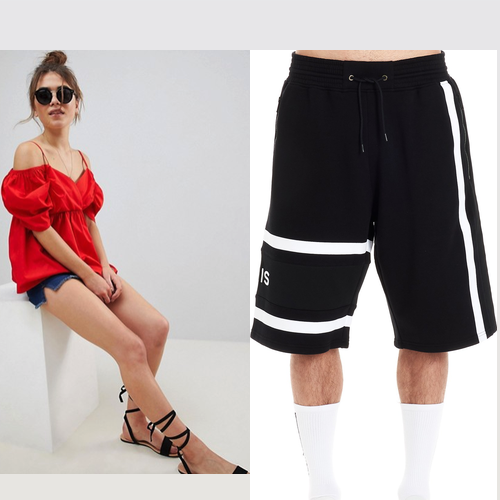

In [95]:
img_size = 500
img_paths = ['/content/asos.png','/content/far.jpg']

rgb_imgs, around, trim_imgs,top_color,bottom_color = [],[],[],[],[]

for i in range(len(img_paths)):
  around.append(get_around(img_paths[i]))
  rgb_imgs.append(open_rgb(img_paths[i]))
  trim_imgs.append(rgb_imgs[i].crop(around[i]))
  
  # find top and bottomo color
  top_color.append(get_median_color(rgb_imgs[i],around[i][1]))
  bottom_color.append(get_median_color(rgb_imgs[i],around[i][3])) 


print('top_color',top_color)
print('bottom_color',bottom_color)

bg_top_color = average_np(top_color)
bg_bottom_color = average_np(bottom_color)

print('bg_top_color',bg_top_color)
print('bg_bottom_color',bg_bottom_color)

# make background
array = get_gradation_3d(img_size,img_size, nparray_to_rgb(bg_top_color), nparray_to_rgb(bg_bottom_color), (False, False, False))
bg = Image.fromarray(np.uint8(array))

# resize
trim_imgs[0].thumbnail((img_size/2 , img_size), Image.ANTIALIAS)
trim_imgs[1].thumbnail((img_size/2 , img_size), Image.ANTIALIAS)


# paste
bg.paste(trim_imgs[0],(0,50))
bg.paste(trim_imgs[1],(int(img_size/2),50))
bg

In [74]:
rgb_img = open_rgb(img_paths[0])
narray = np.array(rgb_img)
result = np.average(narray,axis=1)
result[32]

array([206.09430255, 206.76031434, 209.37524558])

In [45]:
get_median_color(rgb_imgs[i],around[i][3])

array([207., 203., 196.])

In [0]:
get_trim_img('/far.jpg') 